<a href="https://colab.research.google.com/github/kishorekrrish3/Heart-Failure-Prediction/blob/main/Heart-Failure-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
# age -> standard scaling
# sex -> label encoding
# chest pain -> label encoding
# resting bp -> standard scaling
# cholestrol -> standard scaling
# ecg -> label encoding
# max hr -> standard scaling
# exercise -> label encoding
# st slop -> label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data['Age'] = sc.fit_transform(data[['Age']])
data['RestingBP'] = sc.fit_transform(data[['RestingBP']])
data['Cholesterol'] = sc.fit_transform(data[['Cholesterol']])
data['MaxHR'] = sc.fit_transform(data[['MaxHR']])

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# SVM Classifier

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
svm_y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc_svm = accuracy_score(y_test,svm_y_pred)
print("Accuracy Score: ",acc_svm)

Accuracy Score:  0.8913043478260869


Confusion Matrix:
[[ 64  10]
 [ 10 100]]


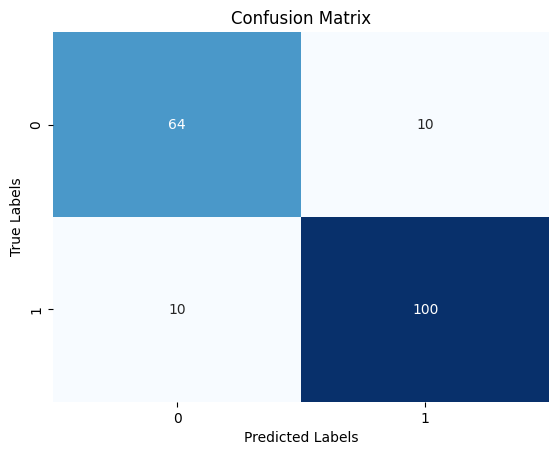

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score: ", accuracy_knn)

Accuracy Score:  0.8532608695652174


Confusion Matrix:
[[62 12]
 [15 95]]


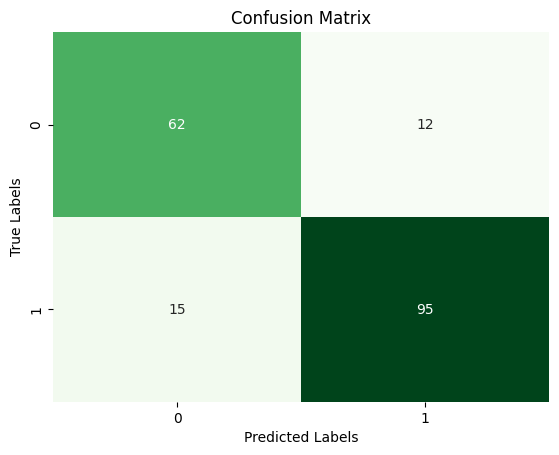

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm2 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm2)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Stochastic Gradient Descent


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [ ]:
sgd_y_pred = clf.predict(X_test)
accuracy_sgd = accuracy_score(y_test, sgd_y_pred)
print("Accuracy Score: ", accuracy_sgd)

Accuracy Score:  0.8586956521739131


Confusion Matrix:
[[59 15]
 [11 99]]


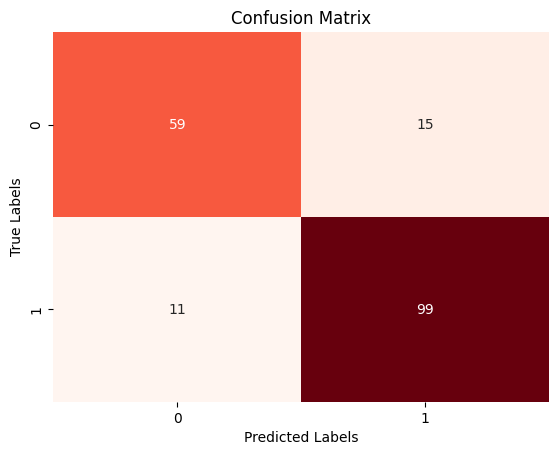

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm3 = confusion_matrix(y_test, sgd_y_pred)
print("Confusion Matrix:")
print(cm3)

sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Gaussian Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb_y_pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_y_pred)
print("Accuracy Score: ", accuracy_gnb)

Accuracy Score:  0.8913043478260869


Confusion Matrix:
[[65  9]
 [11 99]]


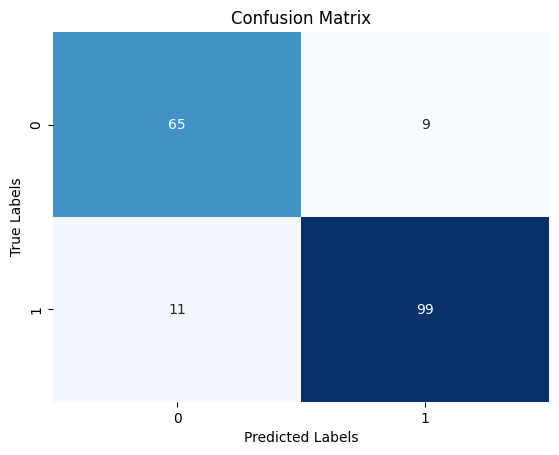

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm4 = confusion_matrix(y_test, gnb_y_pred)
print("Confusion Matrix:")
print(cm4)

sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_y_pred = clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, tree_y_pred)
print("Accuracy Score: ", accuracy_tree)

Accuracy Score:  0.7771739130434783


Confusion Matrix:
[[62 12]
 [29 81]]


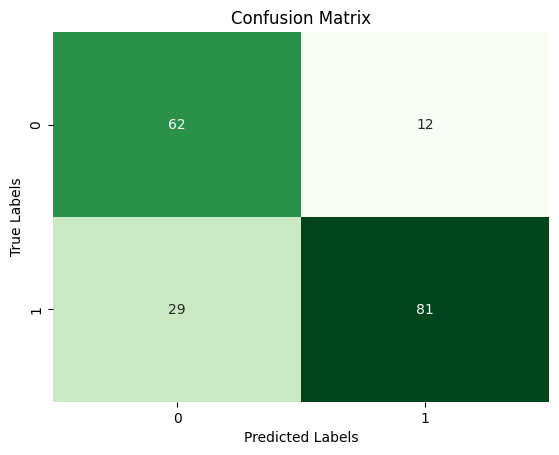

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm5 = confusion_matrix(y_test, tree_y_pred)
print("Confusion Matrix:")
print(cm5)

sns.heatmap(cm5, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100)
clf.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
gb_y_pred = clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
print("Accuracy Score: ", accuracy_gb)

Accuracy Score:  0.8967391304347826


Confusion Matrix:
[[ 65   9]
 [ 10 100]]


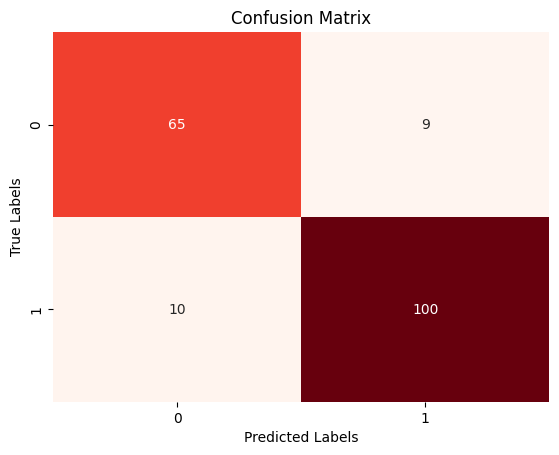

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm6 = confusion_matrix(y_test, gb_y_pred)
print("Confusion Matrix:")
print(cm6)

sns.heatmap(cm6, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()